In [1]:
!git clone https://github.com/balajisrinivas/Gender-Detection.git

Cloning into 'Gender-Detection'...
remote: Enumerating objects: 2312, done.
remote: Total 2312 (delta 0), reused 0 (delta 0), pack-reused 2312 (from 1)
Receiving objects: 100% (2312/2312), 160.66 MiB | 12.43 MiB/s, done.
Updating files: 100% (2311/2311), done.


In [2]:
import os
os.chdir('/content/Gender-Detection')

In [3]:
!pip install cvlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 84.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for cvlib: filename=cvlib-0.2.7-py3-none-any.whl size=10046369 sha256=efd80cf8c3fe0e23d0e6a1d5753c5043bf4b8abed51d5092e412ec586848af16
  Stored in directory: /root/.cache/pip/wheels/47/ea/1c/d618f916b503769662fc15debfdefbf7bc43f014465c3bb7c7
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12066 sha256=f97c27a2eddb1206c00099ed67c337e845fa90fd96ef37a7976a7eefeef486be
  Stored in directory: /root/.cache/pip/wheels/8d/bb/b2/5353b966ac6f3c5e1000629a9a5f6aed41794487f551e32efc
Successfully built cvlib progressbar


In [4]:
!pip install tensorflow==2.12.0 keras==2.12.0 # Downgrade tensorflow and keras to a version compatible with Keras 2


INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 87.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 98.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 8.9 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninsta

In [1]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import os
import cvlib as cv

In [2]:
model = load_model('/content/Gender-Detection/gender_detection.model')


In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 32)        896       
                                                                 
 activation (Activation)     (None, 96, 96, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 96, 96, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        1

In [4]:
classes = ['BOY','GIRL']

In [35]:
test_img=cv2.imread('/content/Gender-Detection/test_images/suresh.jpeg', cv2.IMREAD_COLOR)

In [36]:
test_img.shape

(251, 201, 3)

In [37]:
# test_img=cv2.resize(test _img,(96,96))

In [38]:
frame= test_img

In [39]:
face, confidence = cv.detect_face(test_img)

In [40]:
face

[[81, 28, 108, 64]]

In [41]:
# loop through detected faces
for idx, f in enumerate(face):

    # get corner points of face rectangle
    (startX, startY) = f[0], f[1]
    (endX, endY) = f[2], f[3]

    # draw rectangle over face
    cv2.rectangle(frame, (startX,startY), (endX,endY), (0,255,0), 2)

    # crop the detected face region
    face_crop = np.copy(frame[startY:endY,startX:endX])

    if (face_crop.shape[0]) < 10 or (face_crop.shape[1]) < 10:
        continue

    # preprocessing for gender detection model
    face_crop = cv2.resize(face_crop, (96,96))
    face_crop = face_crop.astype("float") / 255.0
    face_crop = img_to_array(face_crop)
    face_crop = np.expand_dims(face_crop, axis=0)

    # apply gender detection on face
    conf = model.predict(face_crop)[0] # model.predict return a 2D matrix, ex: [[9.9993384e-01 7.4850512e-05]]

    # get label with max accuracy
    idx = np.argmax(conf)
    label = classes[idx]

    label = "{}: {:.2f}%".format(label, conf[idx] * 100)

    Y = startY - 10 if startY - 10 > 10 else startY + 10

    # write label and confidence above face rectangle
    cv2.putText(frame, label, (startX, Y),  cv2.FONT_HERSHEY_SIMPLEX,
                0.7, (0, 255, 0), 2)

1/1 [==============================] - 0s 42ms/step


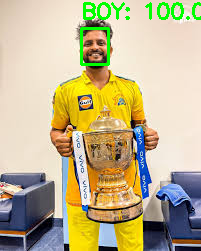

In [42]:
from google.colab.patches import cv2_imshow
cv2_imshow(test_img)

